In [161]:
from facenet_models import FacenetModel

# this will download the pretrained weights (if they haven't already been fetched)
# which should take just a few seconds
model = FacenetModel()

# detect all faces in an image
# returns a tuple of (boxes, probabilities, landmarks)
# assumes ``pic`` is a numpy array of shape (R, C, 3) (RGB is the last dimension)


In [162]:
import numpy as np
class Profile:
    def __init__(self, name: str, descriptor):
        self.name = name
        self.descriptors = [descriptor]
        
       

    def add_descriptor(self, descriptor):
        if(len(descriptor)==0):
            self.descriptors.append(descriptor)
        else:
            self.descriptors = np.vstack([self.descriptors, descriptor])
            
        
    
    
        
        

In [163]:
import pickle

def load_db(path="bb.pickle"):
    try:
        with open(path, mode="rb") as opened_file:
            return pickle.load(opened_file)
    except FileNotFoundError:
        return {}
def add_face(descriptors, name, db):
    if name in db:
        profile = db[name]
        profile.add_descriptor(descriptors)
        db[name] = profile
        
    else:
        profile = Profile(name=name,descriptor=descriptors)
        db[name] = profile

    
    with open("bb.pickle", "wb") as opened_file:
        pickle.dump(db, opened_file)
def remove_face(name, db):
    del face_db[name]
    with open("bb.pickle", "wb") as opened_file:
        pickle.dump(db, opened_file)

    


In [164]:
face_db = load_db() 

[ WARN:0@13800.348] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap_gstreamer.cpp (862) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created


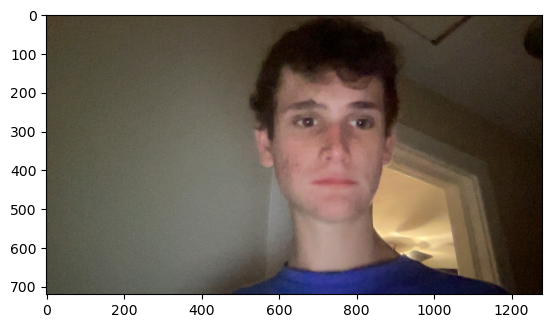

In [165]:
from camera import take_picture
import matplotlib.pyplot as plt
img_array = take_picture()
fig,ax = plt.subplots()
ax.imshow(img_array)

# detect all faces in an image
# returns a tuple of (boxes, probabilities, landmarks)
# assumes ``pic`` is a numpy array of shape (R, C, 3) (RGB is the last dimension)
boxes, probabilities, landmarks = model.detect(img_array)

# producing a face descriptor for each face
# returns a (N, 512) array, where N is the number of boxes
# and each descriptor vector is 512-dimensional

descriptors = model.compute_descriptors(img_array, boxes)
names=["Andrew","Eve"]

for i, descriptor in enumerate(descriptors):
    add_face(descriptor, names[i], face_db) 
    





In [153]:
for name, profile in face_db.items():
    print(f"Name: {name}")
    print(f"Descriptors: {profile.descriptors}")

Name: Andrew
Descriptors: [[-0.05213907 -0.13024516 -0.06180248 ... -0.04676753 -0.04503511
   0.03063219]
 [-0.05213907 -0.13024516 -0.06180248 ... -0.04676753 -0.04503511
   0.03063219]
 [-0.04206172 -0.11957595 -0.06632681 ... -0.07362721 -0.03167423
   0.02341718]
 ...
 [-0.01467146 -0.08398373 -0.03846305 ... -0.06249589 -0.03545244
   0.02693435]
 [-0.03351607 -0.08141199 -0.04301307 ... -0.09630251 -0.07934891
   0.03536612]
 [-0.03524119 -0.10144948 -0.07536446 ... -0.04283124 -0.0379419
   0.02008064]]
Name: Gordie
Descriptors: [[-0.00117682 -0.02795497  0.01513167 ... -0.02316126 -0.05513893
   0.02976658]
 [-0.00117682 -0.02795497  0.01513167 ... -0.02316126 -0.05513893
   0.02976658]
 [-0.00117682 -0.02795497  0.01513167 ... -0.02316126 -0.05513893
   0.02976658]
 ...
 [-0.00117682 -0.02795497  0.01513167 ... -0.02316126 -0.05513893
   0.02976658]
 [-0.00117682 -0.02795497  0.01513167 ... -0.02316126 -0.05513893
   0.02976658]
 [-0.00117682 -0.02795497  0.01513167 ... -0.02

In [166]:
def cos_distances(d1,d2):

    d1_norm=d1/np.linalg.norm(d1,axis=1,keepdims=True)

    d2_norm=d2/np.linalg.norm(d2,axis=1,keepdims=True)

    
    return 1 - (d1_norm @ d2_norm.T)


In [155]:
print(face_db["Andrew"].descriptors)
print(face_db["Andrew"].descriptors)

(cos_distances(face_db["Andrew"].descriptors,face_db["Andrew"].descriptors))


[[-0.05213907 -0.13024516 -0.06180248 ... -0.04676753 -0.04503511
   0.03063219]
 [-0.05213907 -0.13024516 -0.06180248 ... -0.04676753 -0.04503511
   0.03063219]
 [-0.04206172 -0.11957595 -0.06632681 ... -0.07362721 -0.03167423
   0.02341718]
 ...
 [-0.01467146 -0.08398373 -0.03846305 ... -0.06249589 -0.03545244
   0.02693435]
 [-0.03351607 -0.08141199 -0.04301307 ... -0.09630251 -0.07934891
   0.03536612]
 [-0.03524119 -0.10144948 -0.07536446 ... -0.04283124 -0.0379419
   0.02008064]]
[[-0.05213907 -0.13024516 -0.06180248 ... -0.04676753 -0.04503511
   0.03063219]
 [-0.05213907 -0.13024516 -0.06180248 ... -0.04676753 -0.04503511
   0.03063219]
 [-0.04206172 -0.11957595 -0.06632681 ... -0.07362721 -0.03167423
   0.02341718]
 ...
 [-0.01467146 -0.08398373 -0.03846305 ... -0.06249589 -0.03545244
   0.02693435]
 [-0.03351607 -0.08141199 -0.04301307 ... -0.09630251 -0.07934891
   0.03536612]
 [-0.03524119 -0.10144948 -0.07536446 ... -0.04283124 -0.0379419
   0.02008064]]


array([[ 3.57627869e-07,  3.57627869e-07,  1.08073473e-01,
         1.30355895e-01,  8.63636732e-02,  5.82715511e-01,
         2.06960022e-01,  4.65178251e-01,  1.21001005e-01],
       [ 3.57627869e-07,  3.57627869e-07,  1.08073473e-01,
         1.30355895e-01,  8.63636732e-02,  5.82715511e-01,
         2.06960022e-01,  4.65178251e-01,  1.21001005e-01],
       [ 1.08073473e-01,  1.08073473e-01,  5.36441803e-07,
         6.87285066e-02,  4.38637733e-02,  7.07300246e-01,
         1.73136353e-01,  5.62186718e-01,  1.35395467e-01],
       [ 1.30355895e-01,  1.30355895e-01,  6.87285066e-02,
         5.36441803e-07,  7.14385509e-02,  6.35399818e-01,
         1.05498970e-01,  4.57850873e-01,  1.33021891e-01],
       [ 8.63636732e-02,  8.63636732e-02,  4.38637733e-02,
         7.14385509e-02,  1.78813934e-07,  6.74653053e-01,
         1.77821577e-01,  5.20221591e-01,  1.40647411e-01],
       [ 5.82715511e-01,  5.82715511e-01,  7.07300246e-01,
         6.35399818e-01,  6.74653053e-01, -3.576278

[ WARN:0@13838.672] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap_gstreamer.cpp (862) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created


[[-0.00161189 -0.07624622 -0.05015683 ... -0.00376699 -0.05456379
  -0.05189194]
 [-0.00131847 -0.04923595 -0.04778038 ... -0.02792202  0.03542579
  -0.02162151]]
Type something to save: Will


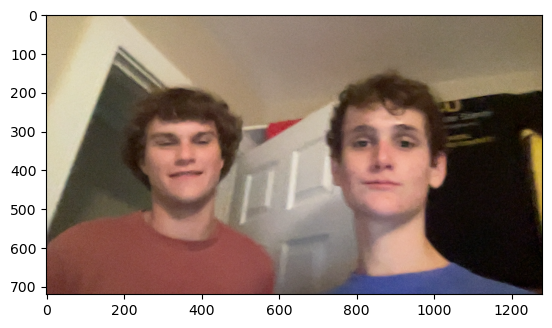

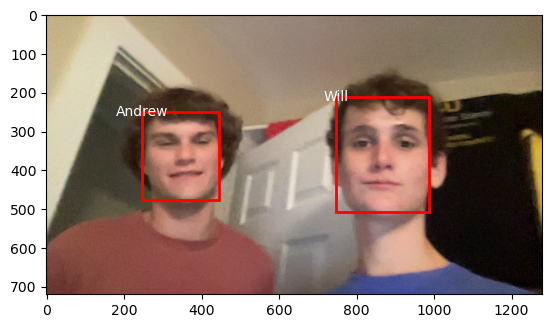

In [168]:
img_array = take_picture()
fig,ax = plt.subplots()
ax.imshow(img_array)

# detect all faces in an image
# returns a tuple of (boxes, probabilities, landmarks)
# assumes ``pic`` is a numpy array of shape (R, C, 3) (RGB is the last dimension)
boxes, probabilities, landmarks = model.detect(img_array)

# producing a face descriptor for each face
# returns a (N, 512) array, where N is the number of boxes
# and each descriptor vector is 512-dimensional
def best_match(descriptors, face_db ,threshold):
   
    threshold = threshold
    min_cos=np.inf
    min_name="Unkown"
    for name, profile in face_db.items():
        distance = cos_distances(np.array(descriptors),face_db[name].descriptors)
        distance=np.mean(distance)
        if distance < min_cos:
            min_cos=distance
            min_name=name
    if min_cos>threshold:
        user_input = input("Type something to save: ")
        add_face(descriptor, user_input, face_db)  
    else:
        add_face(descriptor, name, face_db)     
    return min_name

descriptors = model.compute_descriptors(img_array, boxes)
    


   
from matplotlib.patches import Rectangle
def display(pic,boxes,landmarks,face_db,descriptors):
    fig, ax = plt.subplots()
    ax.imshow(pic)
    
    names=[]
    descriptors = model.compute_descriptors(pic, boxes)
    print(descriptors)
    for descriptor in descriptors:
        
        names.append(best_match([descriptor], face_db,threshold=.5))
    for box, landmark,name in zip(boxes, landmarks,names):
        # draw the box on the screen
    
        ax.add_patch(Rectangle(box[:2], *(box[2:] - box[:2]), fill=None, lw=2, color="red"))
        
            
        ax.text(box[0],box[1], name,
        horizontalalignment='center',
        verticalalignment='center',color="white") 
        # Get the landmarks/parts for the face in box d.
        # Draw the face landmarks on the screen.
    

display(img_array,boxes,landmarks,face_db,descriptors)




In [2]:
import networkx as nx
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt


class Node:
    """ Describes a node in a graph, and the edges connected
        to that node."""

    def __init__(self, ID, neighbors, descriptor, truth=None, file_path=None):
        """
        Parameters
        ----------
        ID : int
            A unique identifier for this node. Should be a
            value in [0, N-1], if there are N nodes in total.

        neighbors : Sequence[int]
            The node-IDs of the neighbors of this node.

        descriptor : numpy.ndarray
            The shape-(512,) descriptor vector for the face that this node corresponds to.

        truth : Optional[str]
            If you have truth data, for checking your clustering algorithm,
            you can include the label to check your clusters at the end.
            If this node corresponds to a picture of Ryan, this truth
            value can just be "Ryan"

        file_path : Optional[str]
            The file path of the image corresponding to this node, so
            that you can sort the photos after you run your clustering
            algorithm
        """
        self.id = ID  # a unique identified for this node - this should never change

        # The node's label is initialized with the node's ID value at first,
        # this label is then updated during the whispers algorithm
        self.label = ID

        # (n1_ID, n2_ID, ...)
        # The IDs of this nodes neighbors. Empty if no neighbors
        self.neighbors = tuple(neighbors)
        self.descriptor = descriptor

        self.truth = truth
        self.file_path = file_path


def plot_graph(graph, adj):
    """ Use the package networkx to produce a diagrammatic plot of the graph, with
    the nodes in the graph colored according to their current labels.
    Note that only 20 unique colors are available for the current color map,
    so common colors across nodes may be coincidental.
    Parameters
    ----------
    graph : Tuple[Node, ...]
        The graph to plot. This is simple a tuple of the nodes in the graph.
        Each element should be an instance of the `Node`-class.

    adj : numpy.ndarray, shape=(N, N)
        The adjacency-matrix for the graph. Nonzero entries indicate
        the presence of edges.

    Returns
    -------
    Tuple[matplotlib.fig.Fig, matplotlib.axis.Axes]
        The figure and axes for the plot."""

    g = nx.Graph()
    for n, node in enumerate(graph):
        g.add_node(n)

    # construct a network-x graph from the adjacency matrix: a non-zero entry at adj[i, j]
    # indicates that an egde is present between Node-i and Node-j. Because the edges are
    # undirected, the adjacency matrix must be symmetric, thus we only look ate the triangular
    # upper-half of the entries to avoid adding redundant nodes/edges
    g.add_edges_from(zip(*np.where(np.triu(adj) > 0)))

    # we want to visualize our graph of nodes and edges; to give the graph a spatial representation,
    # we treat each node as a point in 2D space, and edges like compressed springs. We simulate
    # all of these springs decompressing (relaxing) to naturally space out the nodes of the graph
    # this will hopefully give us a sensible (x, y) for each node, so that our graph is given
    # a reasonable visual depiction
    pos = nx.spring_layout(g)

    # make a mapping that maps: node-lab -> color, for each unique label in the graph
    color = list(iter(cm.tab20b(np.linspace(0, 1, len(set(i.label for i in graph))))))
    color_map = dict(zip(sorted(set(i.label for i in graph)), color))
    colors = [color_map[i.label] for i in graph]  # the color for each node in the graph, according to the node's label

    # render the visualization of the graph, with the nodes colored based on their labels!
    fig, ax = plt.subplots()
    nx.draw_networkx_nodes(g, pos=pos, ax=ax, nodelist=range(len(graph)), node_color=colors)
    nx.draw_networkx_edges(g, pos, ax=ax, edgelist=g.edges())
    return fig, ax

In [3]:
def plot_graph(graph, adj):
    """ Use the package networkx to produce a diagrammatic plot of the graph, with
    the nodes in the graph colored according to their current labels.
    Note that only 20 unique colors are available for the current color map,
    so common colors across nodes may be coincidental.
    Parameters
    ----------
    graph : Tuple[Node, ...]
        The graph to plot. This is simple a tuple of the nodes in the graph.
        Each element should be an instance of the `Node`-class.

    adj : numpy.ndarray, shape=(N, N)
        The adjacency-matrix for the graph. Nonzero entries indicate
        the presence of edges.

    Returns
    -------
    Tuple[matplotlib.fig.Fig, matplotlib.axis.Axes]
        The figure and axes for the plot."""

    g = nx.Graph()
    for n, node in enumerate(graph):
        g.add_node(n)

    # construct a network-x graph from the adjacency matrix: a non-zero entry at adj[i, j]
    # indicates that an egde is present between Node-i and Node-j. Because the edges are
    # undirected, the adjacency matrix must be symmetric, thus we only look ate the triangular
    # upper-half of the entries to avoid adding redundant nodes/edges
    g.add_edges_from(zip(*np.where(np.triu(adj) > 0)))

    # we want to visualize our graph of nodes and edges; to give the graph a spatial representation,
    # we treat each node as a point in 2D space, and edges like compressed springs. We simulate
    # all of these springs decompressing (relaxing) to naturally space out the nodes of the graph
    # this will hopefully give us a sensible (x, y) for each node, so that our graph is given
    # a reasonable visual depiction
    pos = nx.spring_layout(g)

    # make a mapping that maps: node-lab -> color, for each unique label in the graph
    color = list(iter(cm.tab20b(np.linspace(0, 1, len(set(i.label for i in graph))))))
    color_map = dict(zip(sorted(set(i.label for i in graph)), color))
    colors = [color_map[i.label] for i in graph]  # the color for each node in the graph, according to the node's label

    # render the visualization of the graph, with the nodes colored based on their labels!
    fig, ax = plt.subplots()
    nx.draw_networkx_nodes(g, pos=pos, ax=ax, nodelist=range(len(graph)), node_color=colors)
    nx.draw_networkx_edges(g, pos, ax=ax, edgelist=g.edges())
    return fig, ax

[]
[0]
[0, 0]
[0, 0, 0, 48.08890758367959]
[0, 0, 0, 48.08890758367959, 13.5043763693762]
[0, 0, 0, 48.08890758367959, 13.5043763693762, 18.461335144927787]
[0, 0, 0, 48.08890758367959, 13.5043763693762, 18.461335144927787]
[0, 0, 0, 48.08890758367959, 13.5043763693762, 18.461335144927787, 0]
[0, 0, 0, 48.08890758367959, 13.5043763693762, 18.461335144927787, 0, 0]
[0, 0, 0, 48.08890758367959, 13.5043763693762, 18.461335144927787, 0, 0, 0]
[0, 0, 0, 48.08890758367959, 13.5043763693762, 18.461335144927787, 0, 0, 0, 0]
[0, 0, 0, 48.08890758367959, 13.5043763693762, 18.461335144927787, 0, 0, 0, 0, 0]
[0, 0, 0, 48.08890758367959, 13.5043763693762, 18.461335144927787, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 48.08890758367959, 13.5043763693762, 18.461335144927787, 0, 0, 0, 0, 0, 0, 0]
[]
[0]
[0, 0]
[0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0

(<Figure size 640x480 with 1 Axes>, <Axes: >)

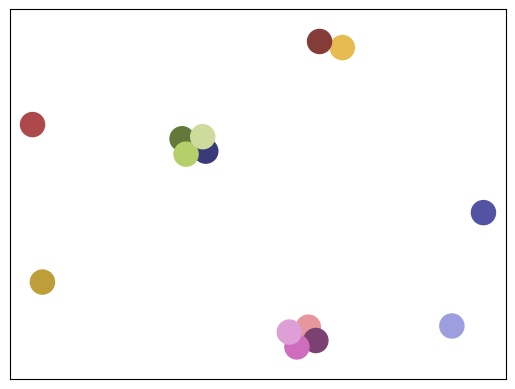

In [142]:
from matplotlib import image
from matplotlib import pyplot
from PIL import Image
import matplotlib.image as mpimg

# load image as pixel array

def nodes_and_adjacency(image_paths,threshold):
    nodes=[]
    matrix=[]
    for i,image in enumerate(image_paths):
        matrix_row=[]
        img = mpimg.imread(image)
    

        boxes, probabilities, landmarks = model.detect(img)
    
        d1=model.compute_descriptors(img, boxes)
        for j,image2 in enumerate(image_paths):
            img2 = mpimg.imread(image2)
            connections=[]
            boxes, probabilities, landmarks = model.detect(img2)
            d2=model.compute_descriptors(img2, boxes)
            if(image != image2 and np.mean(cos_distances(d1,d2))<threshold):
                connections.append(j)
                weight=1/(np.square(np.mean(cos_distances(d1,d2))))
                matrix_row.append(weight)
                print(matrix_row)
            else:
                print(matrix_row)
                matrix_row.append(0)
        matrix.append(matrix_row)
        
        
        nodes.append(Node(i, connections, d1, truth=None, file_path=image_paths[i]))
    return nodes, matrix
    
graph, matrix = nodes_and_adjacency(["rock1.jpeg","human.jpeg","human4.jpeg","rock4.jpeg","rock2.jpeg","rock3.jpeg","h1.jpeg","h3.jpeg","h4.jpeg","h5.jpeg","h8.jpeg","h9.jpeg","h10.jpeg","h11.jpeg"],threshold=.5)
plot_graph(graph,matrix)

[[0, 0, 0, 48.08890758367959, 13.5043763693762, 18.461335144927787, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [48.08890758367959, 0, 0, 0, 56.168021474943984, 41.91267950278517, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [13.5043763693762, 0, 0, 56.168021474943984, 0, 61.031499826069556, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [18.461335144927787, 0, 0, 41.91267950278517, 61.031499826069556, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 7.418235970884561, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 7.418235970884561, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 35.799014550230595, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 35.799014550230595, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4.359438154986464, 6.180412338378469, 57.10287072077534, 35.0

(<Figure size 640x480 with 1 Axes>, <Axes: >)

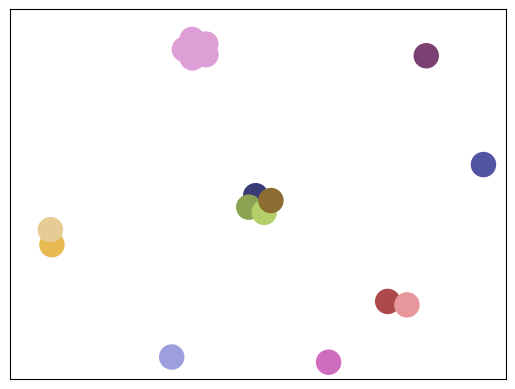

In [139]:
def propagate(nodes,matrix):
    list1=[]
    print(matrix)
    for node in nodes:
        max_weight = 0
        for neighbor in node.neighbors:
            temp = max_weight 

            max_weight = max(max_weight, matrix[node.label][nodes[neighbor].label])
            
            if temp != max_weight:
                node.label = nodes[neighbor].label
propagate(graph,matrix)
plot_graph(graph,matrix)
                
                
                
                
        
    
    

In [140]:
def connected_components(nodes):

    labels_stored = []
    connected_comp = []

    
    for i, node in enumerate(nodes):
        label = node.label
        connections = []
        
        if (label not in labels_stored):
            labels_stored.append(label)
            connections.append(node)
            for node2 in nodes[i+1:]:
                if node2.label == label:
                    connections.append(node2)
        
        connected_comp.append(connections)
    
    return connected_comp

connected_components(graph)


[[<__main__.Node at 0x1603a6ca0>],
 [],
 [],
 [],
 []]

In [120]:
import random
def whispers(times,graph):
    idx=random.choices(nodes, k=times)
    graph
        
                 
        propagate_labels(graph)
    

(5,)


TypeError: 'Node' object is not iterable